In [1]:
import pandas as pd

df = pd.read_csv('data_tbx/means_tbx5b_slop_200kb.csv', sep = '\t')
max_score= df.head(0)


#Change Column names
df = df.rename(columns = {'The':'steps', 'max': 'score'})

#removing null values()
df = df.dropna(axis=1)
df

,steps,score,median_scores
0,0,-0.038782,-0.038782
1,50,-0.038560,-0.038782
2,100,-0.038857,-0.038671
3,150,-0.039512,-0.038733
4,200,-0.039635,-0.038928
...,...,...,...
7986,399300,-0.028087,-0.032045
7987,399350,-0.028820,-0.031240
7988,399400,-0.027570,-0.030724
7989,399450,-0.027542,-0.030006


In [2]:
from scipy import stats
#from statsmodels import robust
#computing aggregations

#trimmed mean
print(f"trimmed mean(0.1): {stats.trim_mean(df['score'], 0.1)}")

#Median absolute deviation
#df.describe(f"Median basolute Deviation: {robust.scale.mad(df['score'])}")

df.describe()

trimmed mean(0.1): -0.02891407320506804


,steps,score,median_scores
count,7991.00000,7991.000000,7991.000000
mean,199750.00000,-0.029086,-0.029091
std,115347.36668,0.004164,0.003834
min,0.00000,-0.043487,-0.042497
25%,99875.00000,-0.031590,-0.031323
50%,199750.00000,-0.028742,-0.028720
75%,299625.00000,-0.026221,-0.026494
max,399500.00000,-0.015919,-0.017556


In [5]:
#Quantiles
df.median_scores.quantile([0.05, 0.25, 0.5, 0.75, 0.95])



0.05   -0.035858
0.25   -0.031323
0.50   -0.028720
0.75   -0.026494
0.95   -0.023512
Name: median_scores, dtype: float64

In [4]:
#Sorting Data
best_scores = df.sort_values(['median_scores'], ascending=False)
best_scores = best_scores[:50]
best_scores

,steps,score,median_scores
816,40800,-0.022021,-0.018898
330,16500,-0.021443,-0.018987
815,40750,-0.021681,-0.019049
817,40850,-0.021584,-0.019254
329,16450,-0.020249,-0.019336
331,16550,-0.023112,-0.019361
257,12850,-0.023288,-0.019639
818,40900,-0.025653,-0.019688
256,12800,-0.021816,-0.019914
328,16400,-0.019127,-0.019996


## Boxplot


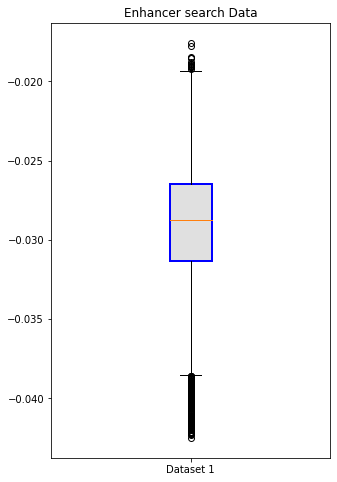

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 8))

labels = ['Dataset 1']

boxes = plt.boxplot([df['median_scores']], labels= labels
                    , patch_artist = True)

for box in boxes['boxes']:
    
    #set edge color
    box.set(color='b', linewidth=2)

    #set fill color
    box.set(facecolor= '#e0e0e0')
    
plt.title('Enhancer search Data')

plt.show()


## Distribution

In [6]:
#Contingency table
freq = pd.cut(df['median_scores'], 10)
score_dis=freq.value_counts()
score_dis

(-0.03, -0.0275]     2160
(-0.0275, -0.025]    1871
(-0.0325, -0.03]     1571
(-0.025, -0.0225]     843
(-0.035, -0.0325]     784
(-0.0375, -0.035]     332
(-0.0225, -0.02]      157
(-0.04, -0.0375]      142
(-0.0425, -0.04]       94
(-0.02, -0.0176]       37
Name: median_scores, dtype: int64

In [26]:
bins = pd.cut(df['median_scores'],bins = 10 ,labels = False, retbins = True)
print(bins)


(0       1
1       1
2       1
3       1
4       1
       ..
7986    4
7987    4
7988    4
7989    5
7990    5
Name: median_scores, Length: 7991, dtype: int64, array([-0.0425218 , -0.04000276, -0.03750866, -0.03501456, -0.03252046,
       -0.03002636, -0.02753226, -0.02503816, -0.02254406, -0.02004996,
       -0.01755586]))


In [27]:
bins = pd.Series([-0.0425218 , -0.04000276, -0.03750866, -0.03501456, -0.03252046,
       -0.03002636, -0.02753226, -0.02503816, -0.02254406, -0.02004996,
       -0.01755586])
bins= bins.round(decimals = 2)
print(bins)

0    -0.04
1    -0.04
2    -0.04
3    -0.04
4    -0.03
5    -0.03
6    -0.03
7    -0.03
8    -0.02
9    -0.02
10   -0.02
dtype: float64


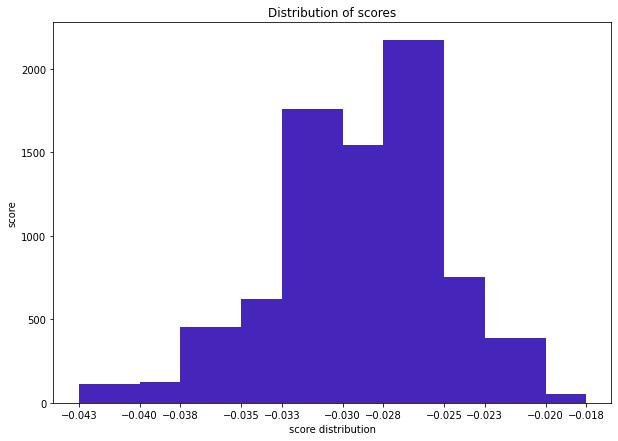

In [28]:
#Histogram
bins = pd.Series([-0.0425218 , -0.04000276, -0.03750866, -0.03501456, -0.03252046,
       -0.03002636, -0.02753226, -0.02503816, -0.02254406, -0.02004996,
       -0.01755586])
bins= bins.round(decimals = 3)

plt.figure(figsize=(10, 7))

plt.hist(df.score, bins=bins, color='#4525ba')

plt.xticks(bins)

plt.ylabel('score')
plt.xlabel('score distribution')
plt.title('Distribution of scores')


plt.show()

In [29]:
#Test Data Frame
df_test = df
df_test

,steps,score,median_scores
0,0,-0.038782,-0.038782
1,50,-0.038560,-0.038782
2,100,-0.038857,-0.038671
3,150,-0.039512,-0.038733
4,200,-0.039635,-0.038928
...,...,...,...
7986,399300,-0.028087,-0.032045
7987,399350,-0.028820,-0.031240
7988,399400,-0.027570,-0.030724
7989,399450,-0.027542,-0.030006


## Plotting the data


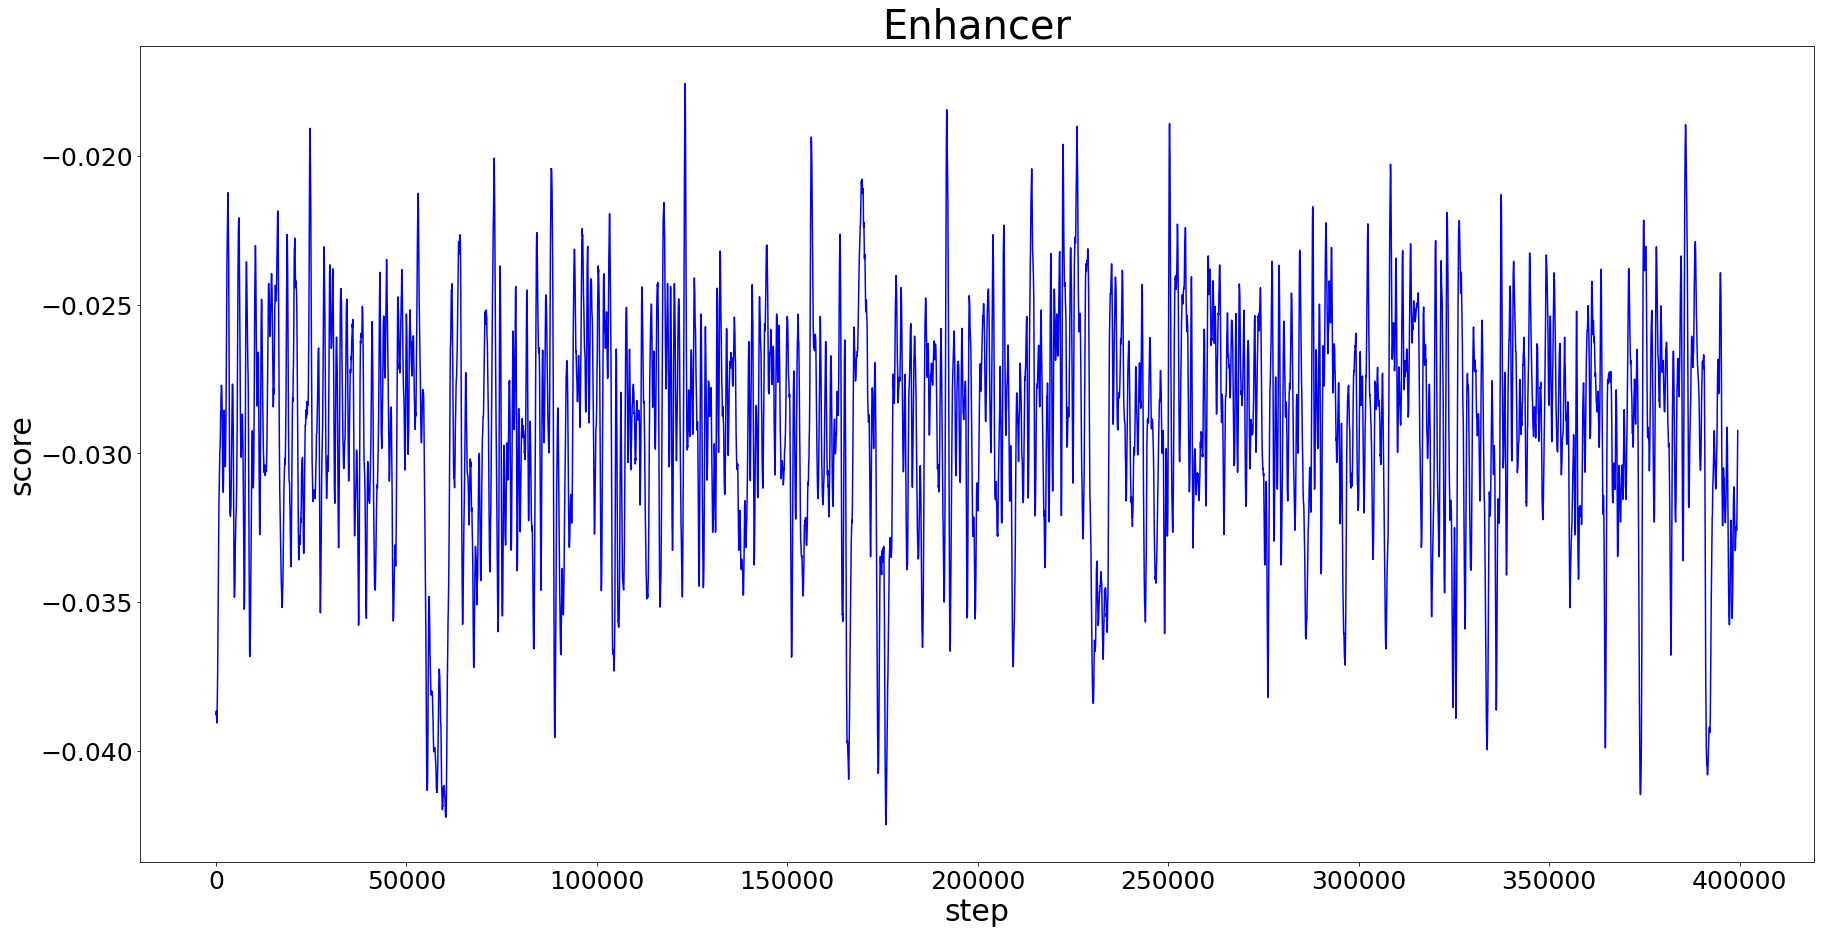

In [30]:
import matplotlib.pyplot as plt
#import mplcursors
#plot
#size of the plt
plt.figure(figsize=(30,15))

plt.title('Enhancer', size=40)

plt.plot(df_test['steps'], df_test['median_scores'],'b')
#plt.plot(df_test['steps'], df_test['score'],'r')

#plt.xticks(df_test.Year[::])

plt.xlabel('step', size=30)
plt.ylabel('score', size=30)

plt.xticks(size=25)
plt.yticks(size=25)
#hover
#mplcursors.cursor(hover=True)

#plt.legend()

plt.show()

In [63]:
peaks = df.loc[df['median_scores'] > -0.02]


In [64]:
print(df['steps'].max(), df['steps'].min())

80100 0


In [65]:
bed = pd.read_csv('tbx5b_region.bed', sep = '\t', names = ['chr', 'start','end'])


In [67]:
#compute locations
peaks['coordinate_start'] =list(peaks['steps'].loc[:]+ bed['start'].loc[0])



/tmp/ipykernel_40185/1602122008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks['coordinate_start'] =list(peaks['steps'].loc[:]+ bed['start'].loc[0])


In [68]:
peaks


,steps,score,median_scores,coordinate_start
256,12800,-0.021816,-0.019914,23174625
257,12850,-0.023288,-0.019639,23174675
328,16400,-0.019127,-0.019996,23178225
329,16450,-0.020249,-0.019336,23178275
330,16500,-0.021443,-0.018987,23178325
331,16550,-0.023112,-0.019361,23178375
815,40750,-0.021681,-0.019049,23202575
816,40800,-0.022021,-0.018898,23202625
817,40850,-0.021584,-0.019254,23202675
818,40900,-0.025653,-0.019688,23202725


In [45]:
sum(bed.end - bed.start)

85142